# Day 6
Do an Analysis by using different Pre-Trained models, (atleast 3), to solve any classification based machine learning problem.



In [1]:
import tensorflow as tf
import os

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,Dropout,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [14]:
base_dir = '/content/drive/MyDrive/datasets_ai_bootcamp'
# use the below link for base dir to use the custom dataset I made
# https://drive.google.com/drive/folders/1REFkQeXGSHHrYbesmlGOl6VqXNCeEEo6?usp=sharing

In [15]:
IMAGE_SIZE = 224 
BATCH_SIZE = 64 

datagen = tf.keras.preprocessing.image.ImageDataGenerator( 
    rescale = 1./255, 
    validation_split=0.2 
   
)

train_generator = datagen.flow_from_directory( 
    base_dir, 
    target_size=(IMAGE_SIZE, IMAGE_SIZE),  
    batch_size = BATCH_SIZE, 
    subset='training' 
)
val_generator = datagen.flow_from_directory(  
    base_dir, 
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='validation'
)

Found 158 images belonging to 2 classes.
Found 38 images belonging to 2 classes.


In [16]:
sample_train_images,_=next(train_generator)


In [17]:
def plotimages(image_arr):
  fig,axes=plt.subplots(1,4,figsize=(20,20))
  axes=axes.flatten()
  for img,ax in zip(image_arr,axes):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show()

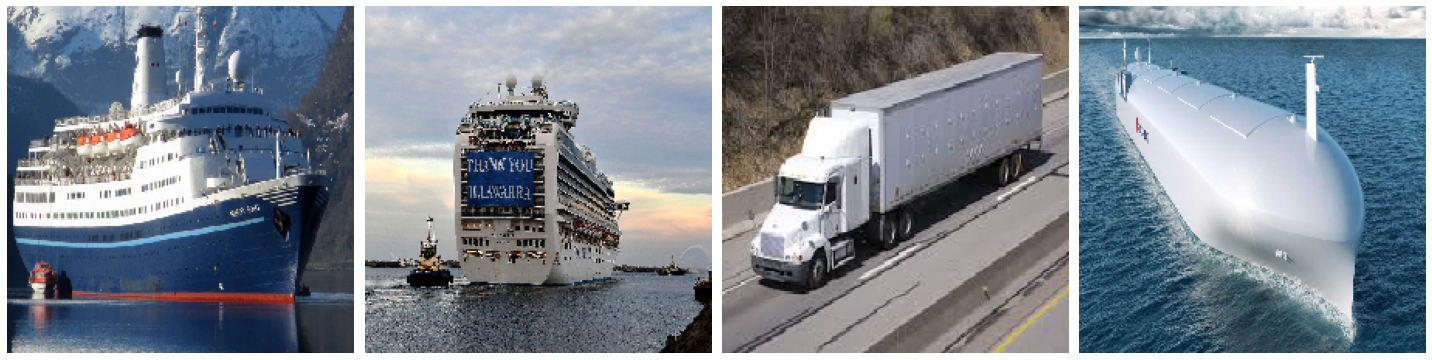

In [18]:
plotimages(sample_train_images[:4])


In [19]:
print(train_generator.class_indices) 
labels = '\n'.join(sorted(train_generator.class_indices.keys()))
with open('labels.txt', 'w') as f: 
    f.write(labels)

{'ships': 0, 'trucks': 1}


https://towardsdatascience.com/how-to-choose-the-best-keras-pre-trained-model-for-image-classification-b850ca4428d4

# 1. using MobileNetV2 pretrained model

In [20]:
IMG_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, 3) 
base_model = tf.keras.applications.MobileNetV2( 
    input_shape=IMG_SHAPE,
    include_top=False, 
    weights='imagenet'
)

In [21]:
base_model.trainable=False 
model = tf.keras.Sequential([ 
  base_model,
  tf.keras.layers.Conv2D(32,3, activation = 'relu'), 
  tf.keras.layers.Dropout(0.2), 
  tf.keras.layers.GlobalAveragePooling2D(), 
  tf.keras.layers.Dense(2, 
                        activation='softmax')
])

In [22]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

In [23]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 5, 5, 32)          368672    
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 32)          0         
_________________________________________________________________
global_average_pooling2d_1 ( (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 66        
Total params: 2,626,722
Trainable params: 368,738
Non-trainable params: 2,257,984
_________________________________________________________________


In [24]:
from tensorflow.keras.callbacks import EarlyStopping

earlystop_callback = EarlyStopping(
  monitor='val_loss', min_delta=0.0001, patience=3)

In [26]:
history1=model.fit(train_generator, epochs=10, validation_data=val_generator, callbacks=[earlystop_callback])


Epoch 1/10
3/3 [==============================] - 14s 4s/step - loss: 0.8201 - accuracy: 0.6519 - val_loss: 0.0042 - val_accuracy: 1.0000
Epoch 2/10
3/3 [==============================] - 10s 3s/step - loss: 0.0663 - accuracy: 0.9937 - val_loss: 0.0929 - val_accuracy: 0.9474
Epoch 3/10
3/3 [==============================] - 10s 3s/step - loss: 0.0679 - accuracy: 0.9937 - val_loss: 0.0531 - val_accuracy: 0.9737
Epoch 4/10
3/3 [==============================] - 10s 3s/step - loss: 0.0353 - accuracy: 0.9937 - val_loss: 0.0057 - val_accuracy: 1.0000


In [ ]:
# epochs = 10 
# history = model.fit(
#     train_generator, 
#     epochs = epochs, 
#     validation_data=val_generator
# )

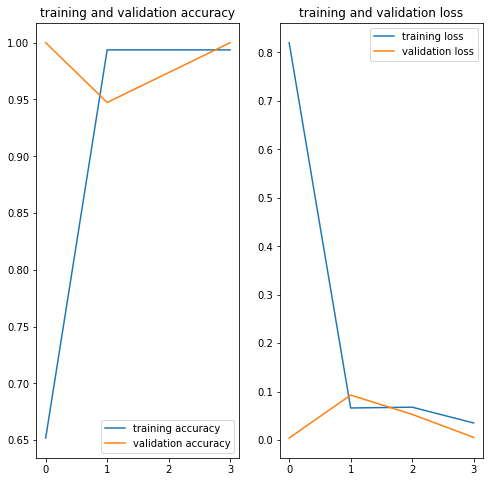

In [33]:
acc=history1.history['accuracy']
val_acc=history1.history['val_accuracy']

loss=history1.history['loss']
val_loss=history1.history['val_loss']

epochs = 4
epochs_range=range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='training accuracy')
plt.plot(epochs_range,val_acc,label='validation accuracy')
plt.legend(loc='lower right')
plt.title('training and validation accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='training loss')
plt.plot(epochs_range,val_loss,label='validation loss')
plt.legend(loc='upper right')
plt.title('training and validation loss')

plt.show()

# using VGG19

In [35]:
IMG_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, 3) 
base_model = tf.keras.applications.VGG19( 
    input_shape=IMG_SHAPE,
    include_top=False, 
    weights='imagenet'
)

80150528/80134624 [==============================] - 1s 0us/step


In [36]:
base_model.trainable=False 
model = tf.keras.Sequential([ 
  base_model,
  tf.keras.layers.Conv2D(32,3, activation = 'relu'), 
  tf.keras.layers.Dropout(0.2), 
  tf.keras.layers.GlobalAveragePooling2D(), 
  tf.keras.layers.Dense(2, 
                        activation='softmax')
])

In [37]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

In [38]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 7, 7, 512)         20024384  
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 5, 32)          147488    
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 32)          0         
_________________________________________________________________
global_average_pooling2d_2 ( (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 20,171,938
Trainable params: 147,554
Non-trainable params: 20,024,384
_________________________________________________________________


In [39]:
history=model.fit(train_generator, epochs=10, validation_data=val_generator, callbacks=[earlystop_callback])


Epoch 1/10
3/3 [==============================] - 132s 44s/step - loss: 0.6099 - accuracy: 0.6329 - val_loss: 0.6420 - val_accuracy: 0.5000
Epoch 2/10
3/3 [==============================] - 128s 43s/step - loss: 0.4047 - accuracy: 0.7595 - val_loss: 0.2696 - val_accuracy: 0.8947
Epoch 3/10
3/3 [==============================] - 127s 42s/step - loss: 0.2488 - accuracy: 0.8734 - val_loss: 0.1105 - val_accuracy: 0.9737
Epoch 4/10
3/3 [==============================] - 126s 53s/step - loss: 0.1015 - accuracy: 0.9810 - val_loss: 0.1334 - val_accuracy: 0.9474
Epoch 5/10
3/3 [==============================] - 130s 55s/step - loss: 0.0715 - accuracy: 0.9873 - val_loss: 0.0511 - val_accuracy: 1.0000
Epoch 6/10
3/3 [==============================] - 127s 43s/step - loss: 0.0282 - accuracy: 1.0000 - val_loss: 0.0604 - val_accuracy: 0.9737
Epoch 7/10
3/3 [==============================] - 127s 53s/step - loss: 0.0275 - accuracy: 0.9937 - val_loss: 0.0441 - val_accuracy: 0.9737
Epoch 8/10
3/3 [====

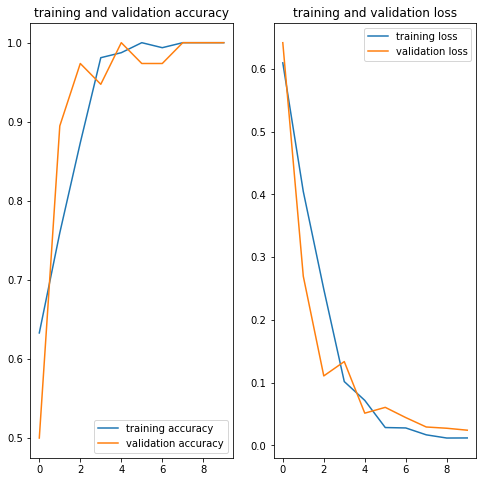

In [40]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs = 10
epochs_range=range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='training accuracy')
plt.plot(epochs_range,val_acc,label='validation accuracy')
plt.legend(loc='lower right')
plt.title('training and validation accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='training loss')
plt.plot(epochs_range,val_loss,label='validation loss')
plt.legend(loc='upper right')
plt.title('training and validation loss')

plt.show()

# InceptionV3

In [41]:
IMG_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, 3) 
base_model = tf.keras.applications.InceptionV3( 
    input_shape=IMG_SHAPE,
    include_top=False, 
    weights='imagenet'
)

87924736/87910968 [==============================] - 1s 0us/step


In [42]:
base_model.trainable=False 
model = tf.keras.Sequential([ 
  base_model,
  tf.keras.layers.Conv2D(32,3, activation = 'relu'), 
  tf.keras.layers.Dropout(0.2), 
  tf.keras.layers.GlobalAveragePooling2D(), 
  tf.keras.layers.Dense(2, 
                        activation='softmax')
])

In [43]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

In [44]:
model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 5, 5, 2048)        21802784  
_________________________________________________________________
conv2d_97 (Conv2D)           (None, 3, 3, 32)          589856    
_________________________________________________________________
dropout_3 (Dropout)          (None, 3, 3, 32)          0         
_________________________________________________________________
global_average_pooling2d_3 ( (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 22,392,706
Trainable params: 589,922
Non-trainable params: 21,802,784
_________________________________________________________________


In [45]:
history=model.fit(train_generator, epochs=10, validation_data=val_generator, callbacks=[earlystop_callback])


Epoch 1/10
3/3 [==============================] - 32s 9s/step - loss: 4.0964 - accuracy: 0.5253 - val_loss: 0.3497 - val_accuracy: 0.5000
Epoch 2/10
3/3 [==============================] - 25s 8s/step - loss: 0.3589 - accuracy: 0.8101 - val_loss: 0.3551 - val_accuracy: 0.9737
Epoch 3/10
3/3 [==============================] - 25s 8s/step - loss: 0.3525 - accuracy: 0.9810 - val_loss: 0.3259 - val_accuracy: 0.9737
Epoch 4/10
3/3 [==============================] - 25s 8s/step - loss: 0.3303 - accuracy: 0.9747 - val_loss: 0.1700 - val_accuracy: 0.9737
Epoch 5/10
3/3 [==============================] - 25s 8s/step - loss: 0.2015 - accuracy: 0.9873 - val_loss: 0.0067 - val_accuracy: 1.0000
Epoch 6/10
3/3 [==============================] - 26s 11s/step - loss: 0.0129 - accuracy: 1.0000 - val_loss: 2.7162e-04 - val_accuracy: 1.0000
Epoch 7/10
3/3 [==============================] - 26s 8s/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0040 - val_accuracy: 1.0000
Epoch 8/10
3/3 [=============

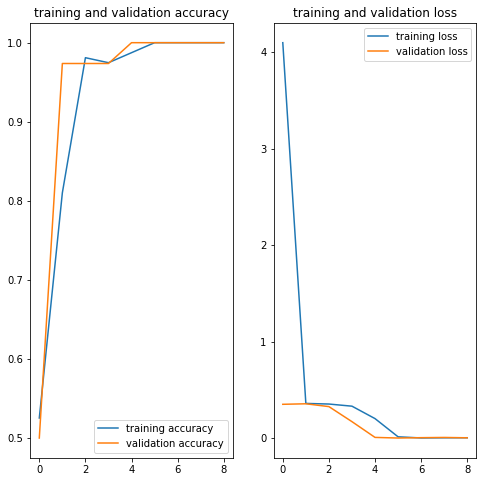

In [47]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs = 9
epochs_range=range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='training accuracy')
plt.plot(epochs_range,val_acc,label='validation accuracy')
plt.legend(loc='lower right')
plt.title('training and validation accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='training loss')
plt.plot(epochs_range,val_loss,label='validation loss')
plt.legend(loc='upper right')
plt.title('training and validation loss')

plt.show()